# **WILD Unsupervised Pipeline**
### Use the unsupervised anomaly detection FastFlow model + WILD unsupervised pipeline to label your data




## Step 1: Upload your images to Google Drive

- Connect this notebook to Google Drive

- Navigate to *wild/data/images*
- Upload train, validation and test sets into respective folders

- Navigate to *wild/data/labels*
- If any ground truth labels are available for comparison, upload them to the the train, validation and test folders respectively




In [ ]:
cd drive/MyDrive/wild

/content/drive/MyDrive/wild


#### Generate list of image names for training set

In [ ]:
import os

directory = "./data/images/train/"
filenames =  os.listdir(directory)

if os.path.exists("./data/train_files.txt"):
      os.remove("./data/train_files.txt")

f = open("./data/train_files.txt", "a+")
f.write("\n".join(filenames))
f.write("\n")
f.close()

#### Generate list of image names for validation set

In [ ]:
import os

directory = "./data/images/val/"
filenames =  os.listdir(directory)

if os.path.exists("./data/val_files.txt"):
      os.remove("./data/val_files.txt")

f = open("./data/val_files.txt", "a")
f.write("\n".join(filenames))
f.write("\n")
f.close()

## Step 2: Run your input images through FastFlow to get anomaly segmentation masks

#### Install requirements for anomalib

- Navigate to *anomalib* directory to install requirements

In [ ]:
cd ./anomalib

/content/drive/MyDrive/wild/anomalib


In [ ]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/wild/anomalib
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/5

### Finetune FastFlow on normal background-only images

- Upload background-only images to *wild/data/images/normal*
- Upload a small number of example images with targets to *wild/data/images/abnormal* for validation
- Upload a small number of example images with no targets to *wild/data/images/normal_test* for validation
- Upload ground truth masks for the images in *wild/data/images/abnormal* to  *wild/data/images/masks* for validation

In [ ]:
!python tools/train.py --config ./src/anomalib/models/fastflow/config_fastflow_train_torch.yaml

OpenVINO is not installed. Please install OpenVINO to use OpenVINOInferencer.
To use wandb logger install it using `pip install wandb`
/content/drive/MyDrive/wild/anomalib/src/anomalib/config/config.py:280: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  warn(
Global seed set to 42
2023-08-14 06:23:00,575 - anomalib.data - INFO - Loading the datamodule
______________________________________
640
2023-08-14 06:23:00,577 - anomalib.data.utils.transform - INFO - No config file has been provided. Using default transforms.
640 640
2023-08-14 06:23:00,578 - anomalib.data.utils.transform - INFO - No config file has been provided. Using default transforms.
640 640
2023-08-14 06:23:00,578 - anomalib.models - INFO - Loading the model.
2023-08-14 06:23:00,579 - anomalib.models.components.base.anomaly_module - INFO - Initializing FastflowLightning model.
/usr/local/lib/python3.10/dist

### Get FastFlow segmentation masks for train and val sets

#### Parameter Guide

- weights: path_to_weights
- input: path_to_images_to_label
- output: output_folder_for_masks
- visualisation_mode: simple - saves just the segmentation mask
- task: segmentation

#### Run training images through FastFlow

In [ ]:
!python tools/inference/torch_inference.py \
    --weights results/fastflow/spots_data_subset/run/weights/torch/model.pt \
    --input ../data/images/train  \
    --output ../data/us_labels/masks/ \
    --visualization_mode simple \
    --task segmentation

OpenVINO is not installed. Please install OpenVINO to use OpenVINOInferencer.
/content/drive/MyDrive/wild/anomalib/src/anomalib/data/utils/image.py:140: UserWarning: ../data/us_labels/masks already exists. Renaming the file to avoid overwriting.
  warnings.warn(f"{output_path} already exists. Renaming the file to avoid overwriting.")


#### Run validation images through FastFlow

In [ ]:
!python tools/inference/torch_inference.py \
    --weights results/fastflow/spots_data_subset/run/weights/torch/model.pt \
    --input ../data/images/val  \
    --output ../data/us_labels/masks/ \
    --visualization_mode simple \
    --task segmentation

OpenVINO is not installed. Please install OpenVINO to use OpenVINOInferencer.


## Step 3: Convert anomaly detection segmentation masks to pseudo-labels

#### Move out of FastFlow folder

In [ ]:
cd ../

/content/drive/MyDrive/wild


#### Create pseudo-labels for training set

- Select input type *anomaly*

- Set file paths

- Set batching parameters

In [ ]:
!python autolabel.py \
    --input_type 'anomaly' \
    --img_path "./data/images/train" \
    --msk_path "./data/us_labels/masks/train/" \
    --dest_path "./data/us_labels/raw_labels/train/" \
    --image_list "./data/train_files.txt" \
    --batch_start_index 0 \
    --batch_size 3 \
    --sample_interval 1

Generating pseudo-labels based on anomaly segmentation masks...


#### Create pseudo-labels for validation set

In [ ]:
!python autolabel.py \
    --input_type 'anomaly' \
    --img_path "./data/images/val" \
    --msk_path "./data/us_labels/masks/val/" \
    --dest_path "./data/us_labels/raw_labels/val/" \
    --image_list "./data/val_files.txt" \
    --batch_start_index 0 \
    --batch_size 3 \
    --sample_interval 1

Generating pseudo-labels based on anomaly segmentation masks...


## Step 4: Visualise bounding boxes to check generated pseudo-labels

- Bounding boxes can be visualised on the original images to check their validity
- Bounding boxes can be plotted for the generated pseudo-labels alone or together with ground truth labels if available

In [ ]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np

def show(imgs):
    """
    Visualise images.

    Arguments:
    - Images to be plotted
    """
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

#### Plot bounding boxes for pseudo-labels only

In [ ]:
!python visualise_labels.py \
    --filename "t7-frame_020720.png" \
    --img_path "./data/images/train/" \
    --gt_label_path "" \
    --pseudo_label_path "./data/us_labels/raw_labels/train/" \
    --output_dir "./data/us_labels/bbs/train/" \
    --image_size 640

Visualising bounding boxes for specified image...
Binary Mask IOU between ground truth and pseudolabel: 0.0


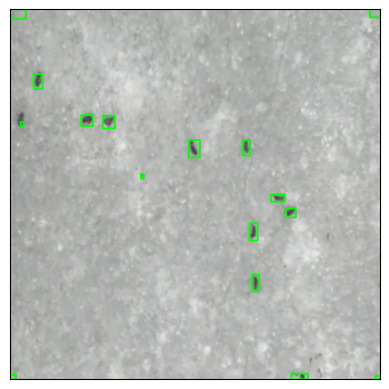

In [ ]:
im = read_image("./data/us_labels/bbs/train/t7-frame_020720_bbs.png")
show(im)

#### Plot bounding boxes for pseudo-labels and ground truth

In [ ]:
!python visualise_labels.py \
    --filename "t7-frame_020720.png" \
    --img_path "./data/images/train/" \
    --gt_label_path "./data/labels/train/" \
    --pseudo_label_path "./data/us_labels/raw_labels/train/" \
    --output_dir "./data/us_labels/bbs/train/" \
    --image_size 640

Visualising bounding boxes for specified image...
Binary Mask IOU between ground truth and pseudolabel: 0.26594982078853047


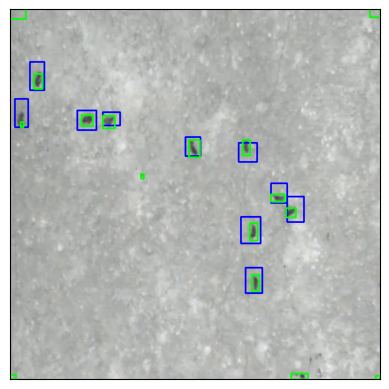

In [ ]:
im = read_image("./data/us_labels/bbs/train/t7-frame_020720_bbs.png")
show(im)

#### Plot bounding boxes for multiple images

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/train_files.txt" \
    --img_path "./data/images/train/" \
    --gt_label_path "./data/labels/train/" \
    --pseudo_label_path "./data/us_labels/raw_labels/train/" \
    --output_dir "./data/us_labels/bbs/train/" \
    --image_size 640

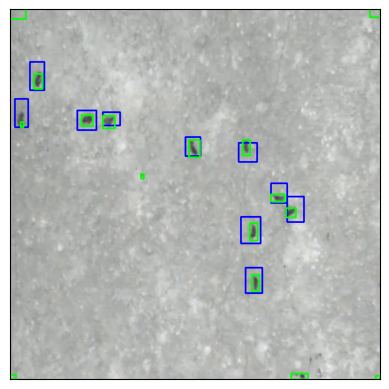

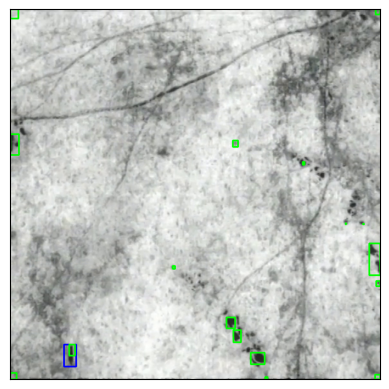

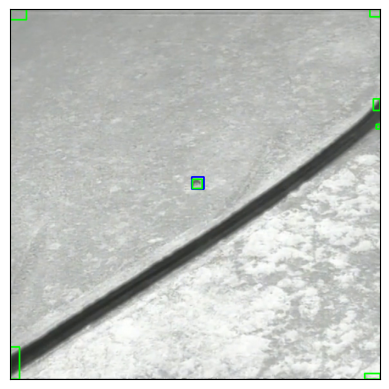

In [ ]:
im1 = read_image("./data/us_labels/bbs/train/t7-frame_020720_bbs.png")
show(im1)
im2 = read_image("./data/us_labels/bbs/train/t1-frame_048295_bbs.png")
show(im2)
im3 = read_image("./data/us_labels/bbs/train/t1-frame_076930_bbs.png")
show(im3)

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/val_files.txt" \
    --img_path "./data/images/val/" \
    --gt_label_path "./data/labels/val/" \
    --pseudo_label_path "./data/us_labels/raw_labels/val/" \
    --output_dir "./data/us_labels/bbs/val/" \
    --image_size 640

Visualising bounding boxes for image set...


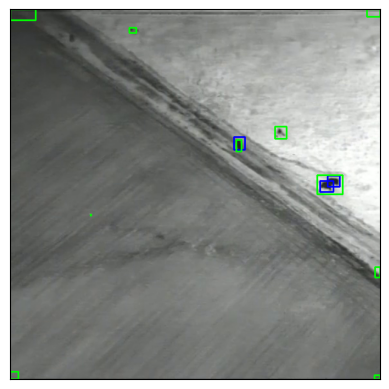

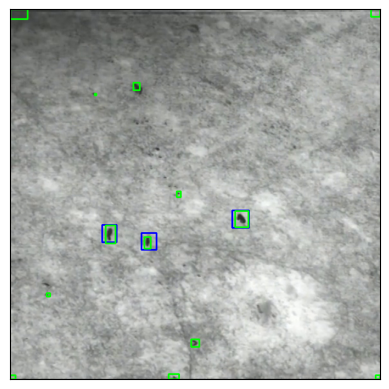

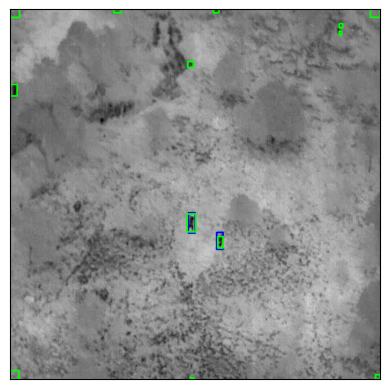

In [ ]:
im1 = read_image("./data/us_labels/bbs/val/t1-frame_020640_bbs.png")
show(im1)
im2 = read_image("./data/us_labels/bbs/val/t1-frame_092915_bbs.png")
show(im2)
im3 = read_image("./data/us_labels/bbs/val/videobh_2_005204_bbs.png")
show(im3)

## Step 5: Post-Processing

- For unsupervised anomaly detection, an additional post-processing step is required to filter out artefacts around the edge of the frame
- Parameters can be tweaked to suit your dataset best

### a) Filtering of Edge Artefacts

In [ ]:
!python postprocessing.py \
    --task "edge_filt" \
    --image_list "./data/train_files.txt" \
    --source_path "./data/us_labels/raw_labels/train/" \
    --dest_path "./data/us_labels/processed_labels/train/" \
    --im_size 640

Filter out edge artefacts...
0


In [ ]:
!python postprocessing.py \
    --task "edge_filt" \
    --image_list "./data/val_files.txt" \
    --source_path "./data/us_labels/raw_labels/val/" \
    --dest_path "./data/us_labels/processed_labels/val/" \
    --im_size 640

Filter out edge artefacts...
0


### Visualise processed labels after edge filtering

#### Training set

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/train_files.txt" \
    --img_path "./data/images/train/" \
    --gt_label_path "./data/labels/train/" \
    --pseudo_label_path "./data/us_labels/processed_labels/train/" \
    --output_dir "./data/us_labels/bbs/train/" \
    --image_size 640

Visualising bounding boxes for image set...


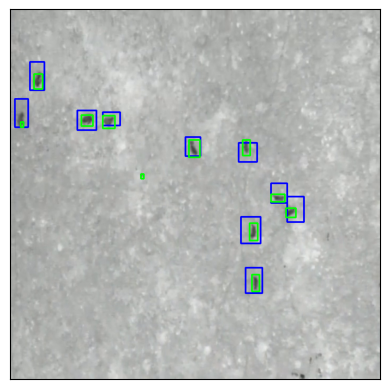

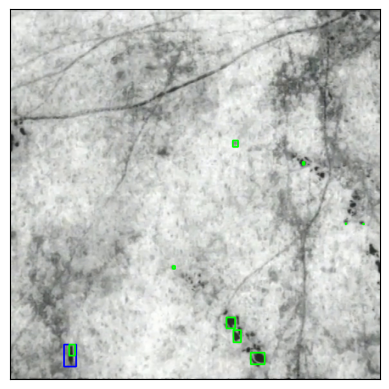

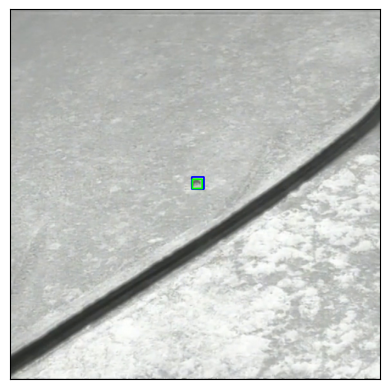

In [ ]:
im1 = read_image("./data/us_labels/bbs/train/t7-frame_020720_bbs.png")
show(im1)
im2 = read_image("./data/us_labels/bbs/train/t1-frame_048295_bbs.png")
show(im2)
im3 = read_image("./data/us_labels/bbs/train/t1-frame_076930_bbs.png")
show(im3)

#### Validation set

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/val_files.txt" \
    --img_path "./data/images/val/" \
    --gt_label_path "./data/labels/val/" \
    --pseudo_label_path "./data/us_labels/processed_labels/val/" \
    --output_dir "./data/us_labels/bbs/val/" \
    --image_size 640

Visualising bounding boxes for image set...


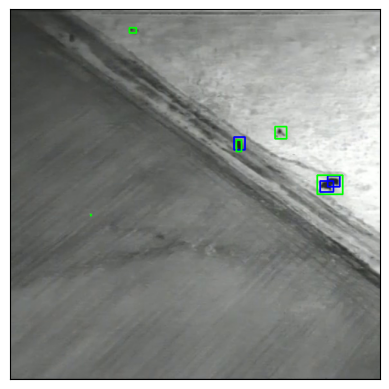

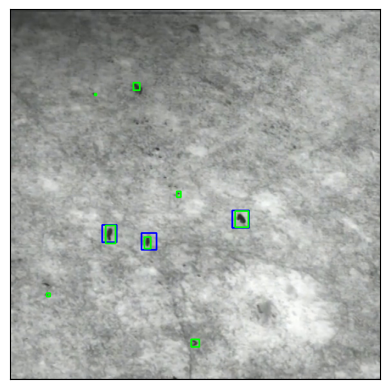

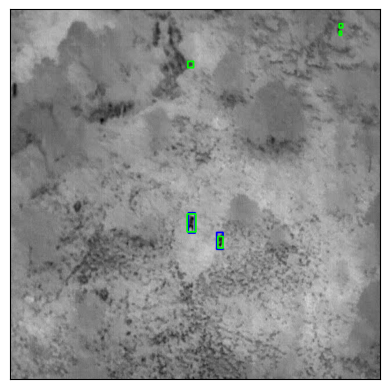

In [ ]:
im1 = read_image("./data/us_labels/bbs/val/t1-frame_020640_bbs.png")
show(im1)
im2 = read_image("./data/us_labels/bbs/val/t1-frame_092915_bbs.png")
show(im2)
im3 = read_image("./data/us_labels/bbs/val/videobh_2_005204_bbs.png")
show(im3)

### b) Filtering of Small Bounding Boxes/Noise

In [ ]:
!python postprocessing.py \
    --task "filt" \
    --image_list "./data/train_files.txt" \
    --source_path "./data/us_labels/processed_labels/train/" \
    --dest_path "./data/us_labels/processed_labels/train/" \
    --param_value 0.015

Filtering small bounding boxes/noise...
Chosen filtering threshold: 0.015


In [ ]:
!python postprocessing.py \
    --task "filt" \
    --image_list "./data/val_files.txt" \
    --source_path "./data/us_labels/processed_labels/val/" \
    --dest_path "./data/us_labels/processed_labels/val/" \
    --param_value 0.015

Filtering small bounding boxes/noise...
Chosen filtering threshold: 0.015


### Visualise processed labels after filtering

#### Training set

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/train_files.txt" \
    --img_path "./data/images/train/" \
    --gt_label_path "./data/labels/train/" \
    --pseudo_label_path "./data/us_labels/processed_labels/train/" \
    --output_dir "./data/us_labels/bbs/train/" \
    --image_size 640

Visualising bounding boxes for image set...


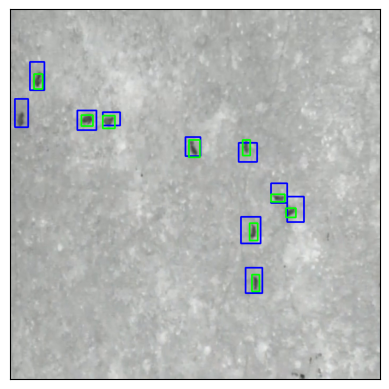

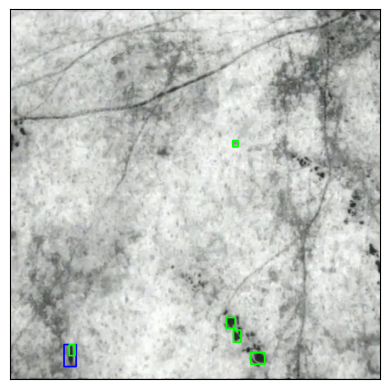

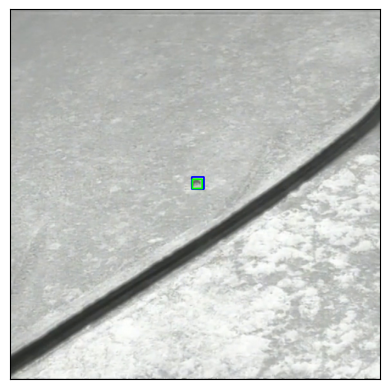

In [ ]:
im1 = read_image("./data/us_labels/bbs/train/t7-frame_020720_bbs.png")
show(im1)
im2 = read_image("./data/us_labels/bbs/train/t1-frame_048295_bbs.png")
show(im2)
im3 = read_image("./data/us_labels/bbs/train/t1-frame_076930_bbs.png")
show(im3)

#### Validation set

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/val_files.txt" \
    --img_path "./data/images/val/" \
    --gt_label_path "./data/labels/val/" \
    --pseudo_label_path "./data/us_labels/processed_labels/val/" \
    --output_dir "./data/us_labels/bbs/val/" \
    --image_size 640

Visualising bounding boxes for image set...


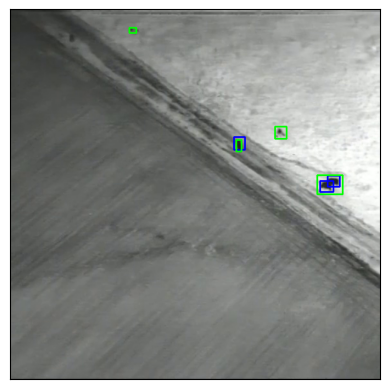

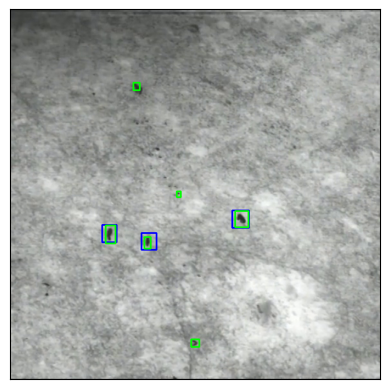

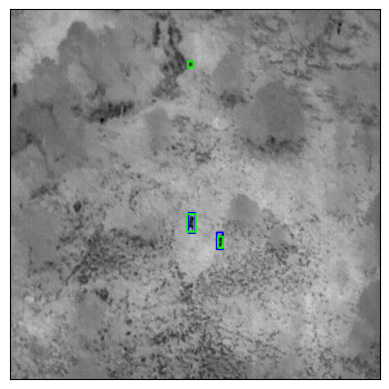

In [ ]:
im1 = read_image("./data/us_labels/bbs/val/t1-frame_020640_bbs.png")
show(im1)
im2 = read_image("./data/us_labels/bbs/val/t1-frame_092915_bbs.png")
show(im2)
im3 = read_image("./data/us_labels/bbs/val/videobh_2_005204_bbs.png")
show(im3)

### c) Padding

In [ ]:
!python postprocessing.py \
    --task "pad" \
    --image_list "./data/train_files.txt" \
    --source_path "./data/us_labels/processed_labels/train/" \
    --dest_path "./data/us_labels/processed_labels/train/" \
    --param_value 0.01

Padding bounding boxes for better representation...
Chosen padding value: 0.01
Pad bounding boxes for 3 labels.


In [ ]:
!python postprocessing.py \
    --task "pad" \
    --image_list "./data/val_files.txt" \
    --source_path "./data/us_labels/processed_labels/val/" \
    --dest_path "./data/us_labels/processed_labels/val/" \
    --param_value 0.01

Padding bounding boxes for better representation...
Chosen padding value: 0.01
Pad bounding boxes for 3 labels.


### Visualise processed labels after padding

#### Training set

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/train_files.txt" \
    --img_path "./data/images/train/" \
    --gt_label_path "./data/labels/train/" \
    --pseudo_label_path "./data/us_labels/processed_labels/train/" \
    --output_dir "./data/us_labels/bbs/train/"

Visualising bounding boxes for image set...


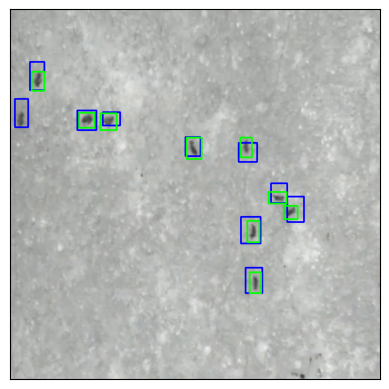

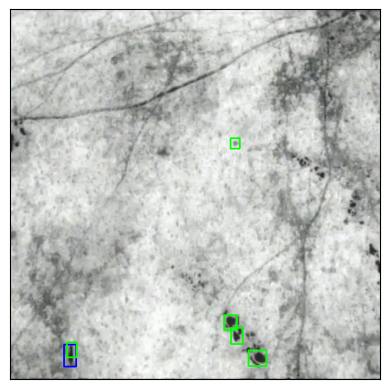

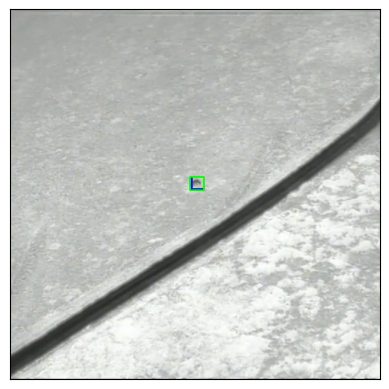

In [ ]:
im1 = read_image("./data/us_labels/bbs/train/t7-frame_020720_bbs.png")
show(im1)
im2 = read_image("./data/us_labels/bbs/train/t1-frame_048295_bbs.png")
show(im2)
im3 = read_image("./data/us_labels/bbs/train/t1-frame_076930_bbs.png")
show(im3)

#### Validation set

In [ ]:
!python visualise_labels.py \
    --multi  \
    --image_list "./data/val_files.txt" \
    --img_path "./data/images/val/" \
    --gt_label_path "./data/labels/val/" \
    --pseudo_label_path "./data/us_labels/processed_labels/val/" \
    --output_dir "./data/us_labels/bbs/val/"

Visualising bounding boxes for image set...


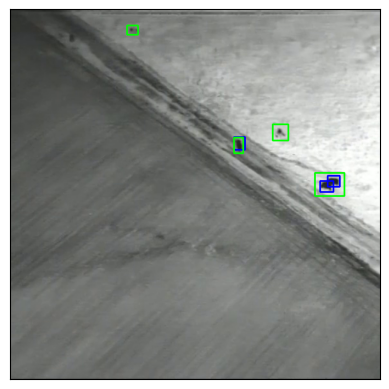

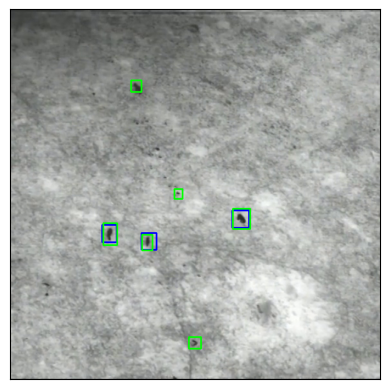

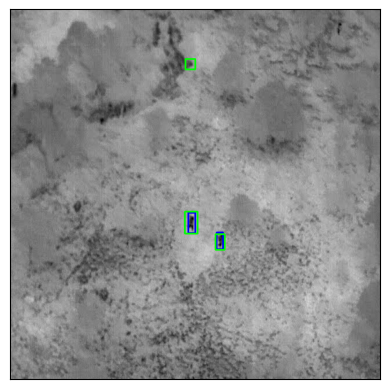

In [ ]:
im1 = read_image("./data/us_labels/bbs/val/t1-frame_020640_bbs.png")
show(im1)
im2 = read_image("./data/us_labels/bbs/val/t1-frame_092915_bbs.png")
show(im2)
im3 = read_image("./data/us_labels/bbs/val/videobh_2_005204_bbs.png")
show(im3)

### Optional: Try different hyperparameters to improve performance

- Tweak any hyperparameter stated above to better suit your dataset

## Step 6: Train your detection model

- While the purpose of this notebook is provide an accessible means of labelling aerial data, the labelled data may commonly be used for detection tasks such as training a YOLOv5 object detection model

- Training and inference using the YOLOv5 detection model can be performed as documented: https://github.com/ultralytics/yolov5

- Training and validation of the YOLOv5 model on the full SPOTS dataset has not been included below due to data privacy, however for completeness, the below steps outline the detection training and inference process and hyperparameters used in the study.

#### Clone YOLOv5

In [ ]:
# Run once to clone YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5

#### Install requirements

In [ ]:
cd ./yolov5

In [ ]:
!pip install -r requirements.txt  # install

#### Set up data

- Create a data.yaml file for training

Example:

```
# Train/val/test sets
path: ../data/  # dataset root dir
train: images/train  # train images (relative to 'path')
val: images/val # val images (relative to 'path')
test: images/test # test images

# Classes
nc: 1 # number of classes
names: ['target']  # class names
```

#### Training

In [ ]:
!python train.py --img 640 --batch 32 --epochs 50 --data data.yaml --weights  yolov5s.pt

#### Inference

#### Save output predictions to text files

In [ ]:
!python val.py --weights runs/train/exp1/weights/best.pt --data data.yaml --img 640 --task test --save-txt --save-conf